## Question 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import urllib.request

Part 1

In [2]:
categories = ["music", "sports and games", "history", "science"]
subsections = ["music_14", "sports-and-games_17", 
               "travel_2", "history_32", "science_22"]
urls = ["https://books.toscrape.com/catalogue/category/books/" + section + "/index.html" for section in subsections]
print(urls)

['https://books.toscrape.com/catalogue/category/books/music_14/index.html', 'https://books.toscrape.com/catalogue/category/books/sports-and-games_17/index.html', 'https://books.toscrape.com/catalogue/category/books/travel_2/index.html', 'https://books.toscrape.com/catalogue/category/books/history_32/index.html', 'https://books.toscrape.com/catalogue/category/books/science_22/index.html']


You need to select five of your favorite categories and scrape the full name of books, categories, book ratings, and prices. Finally, store the scraped four variables into one .csv file. 

There are 46 entries when looking at the following categories: "music", "sports and games", "history", "science"

In [3]:

df = pd.DataFrame(columns = ["Title",
                "Category",
                "Rating",
                "Price"])  # Initially empty DataFrame
for url, category in zip(urls, categories):
    response = urllib.request.urlopen(url)
    html_content = response.read()

    soup = BeautifulSoup(html_content, "html.parser")

    books = soup.find_all("li", class_="col-xs-6 col-sm-4 col-md-3 col-lg-3")


    for book in books: 
        title = book.find("h3").find("a").get("title")
        rating = book.find("p", class_ = "star-rating").get("class")[1]
        price = float(book.find("p" , class_ ="price_color").get_text()[1:])

        data = {"Title": title,
                "Category": category,
                "Rating": rating,
                "Price": price}
        df = pd.concat([df, pd.DataFrame(data, index = [0])], ignore_index=True)
df["Rating"] = df["Rating"].map({"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5})
df.head(10)

,Title,Category,Rating,Price
0,Rip it Up and Start Again,music,5,35.02
1,Our Band Could Be Your Life: Scenes from the A...,music,3,57.25
2,How Music Works,music,2,37.32
3,Love Is a Mix Tape (Music #1),music,1,18.03
4,Please Kill Me: The Uncensored Oral History of...,music,4,31.19
5,Kill 'Em and Leave: Searching for James Brown ...,music,5,45.05
6,"Chronicles, Vol. 1",music,2,52.60
7,This Is Your Brain on Music: The Science of a ...,music,1,38.40
8,Orchestra of Exiles: The Story of Bronislaw Hu...,music,3,12.36
9,No One Here Gets Out Alive,music,5,20.02


Part 2.1

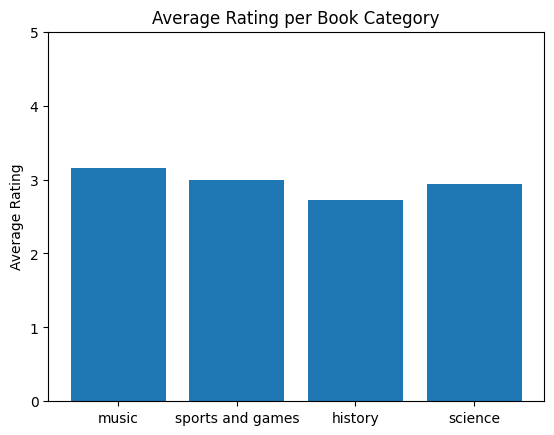

In [4]:
mean_rating = []
for category in categories:

    mean_rating.append(df[(df["Category"] == category)]['Rating'].values.mean())
    
plt.figure()
plt.bar(categories, mean_rating)
plt.ylim([0, 5])
plt.ylabel('Average Rating')

plt.title('Average Rating per Book Category')
plt.show()

Part 2.2

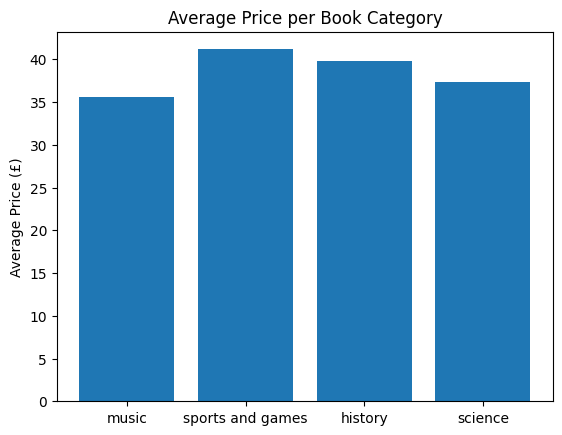

In [5]:
mean_rating = []
for category in categories:

    mean_rating.append(df[(df["Category"] == category)]['Price'].values.mean())
    
plt.figure()
plt.bar(categories, mean_rating)
plt.ylabel('Average Price (£)')
plt.title('Average Price per Book Category')

plt.show()